6 
パイプライン　：
- データ変換とモデル実行のチェーン構築がラクになる

In [14]:
# インポート集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import os
%matplotlib inline

In [6]:
# SVM x cancer x MinMaxScaler
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# データロード
dc = load_breast_cancer()
xa,xe,ya,ye = train_test_split(dc.data, dc.target, random_state=0)
# スケール変換
sm = MinMaxScaler().fit(xa)
xas = sm.transform(xa)
# モデル構築・学習
m = SVC()
m.fit(xas, ya)
# 評価（テストデータもスケール変換してから）
xes = sm.transform(xe)
print(ms.score(xes, ye))

0.951048951048951


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


6.1 前処理する際のパラメタ選択


In [11]:
# 悪例（GridSearchでパラメタ選択）
from sklearn.model_selection import GridSearchCV
pg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
# GridSearch
g = GridSearchCV(SVC(), param_grid=pg, cv=5)
g.fit(xas, ya)
print("best cv acc", g.best_score_)
print("best set score", g.score(xes, ye))
print(g.best_params_)

best cv acc 0.9812206572769953
best set score 0.972027972027972
{'C': 1, 'gamma': 1}


In [12]:
# 訓練データをスケール変換し、その全てを使ってCVしているのが問題（CVではデータを分割する）
# （スケール変換に使用したデータをCV内のテストデータにしている（テストデータは使用済みにしてはいけない））
# （テストデータはモデルに対して全くの未知でなければいけない）

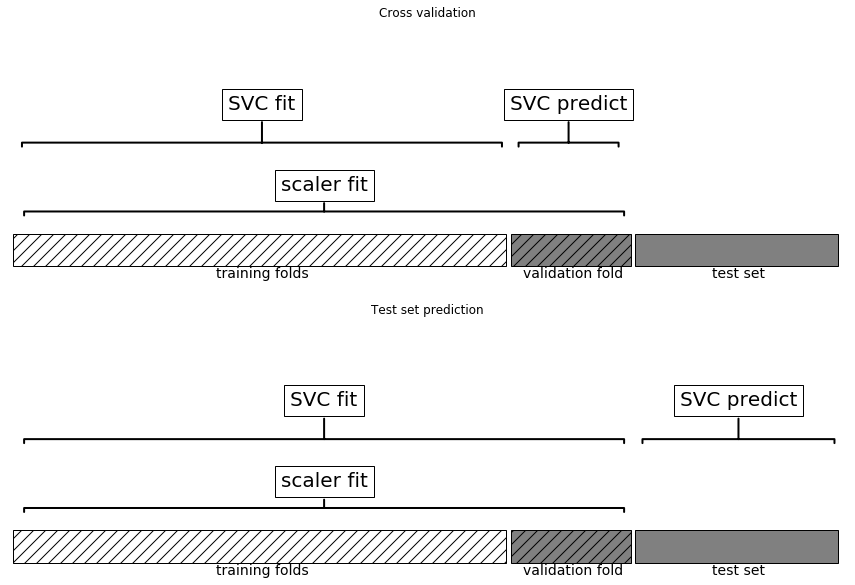

In [15]:
# CVの様子
mglearn.plots.plot_improper_processing()

In [17]:
# CrossValidation（上図）でスケール変換にしようしたデータの一部をテストデータとしてpredictしているのが問題
# -> 分割してから前処理すれば良い

Pipelineクラス：
- 複数の処理ステップを繋げて1つのEstimatorにする
- fit, predict, storeメソッド
- 前処理ステップと教師ありモデルを組み合わせるために多い

In [19]:
# Pipeline
from sklearn.pipeline import Pipeline
# Pipeline作成（２ステップ作成（1つ目は名前：Scaler、インスタンス：MinMaxScaler））
pipe = Pipeline([("scaler", MinMaxScaler()), ("ms", SVC()) ] )
# fit
pipe.fit(xa, ya)
print(pipe.score(xe, ye))

0.951048951048951


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
